# Z-Test

In [1]:
# import pandas
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import the function to calculate the power of test
from statsmodels.stats import power

### What is Z Test?

- A z-test is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large provided the data follows a normal distribution.
- The z test can be performed on one sample, two samples, or on proportions for hypothesis testing. 

### One-Sample Z Test

- A one-sample z test is used to check if there is a difference between the sample mean and the population mean when the population standard deviation is known. 


 $\begin{equation*}z=\frac{(x^-−μ)}{(σ/√n)}\end{equation*}$
 
 where:
 
    x=sample mean 
    μ=population mean
    σ=population standard deviation
    n=sample size

### Left Tailed Test:

- Null Hypothesis: H0: μ=μ0
- Alternate Hypothesis: H1: μ<μ0
- Decision Criteria: If the z statistic < z critical value then reject the null hypothesis.

### Right Tailed Test:

- Null Hypothesis: H0: μ=μ0
- Alternate Hypothesis: H1: μ>μ0
- Decision Criteria: If the z statistic > z critical value then reject the null hypothesis.

### Two Tailed Test:

- Null Hypothesis: H0: μ=μ0
- Alternate Hypothesis: H1: μ≠μ0
- Decision Criteria: If the z statistic > z critical value then reject the null hypothesis.



### Two Sample Z Test

- A two sample z test is used to check if there is a difference between the population means of two samples. 


$\begin{equation*}z =\frac{(x1−x2)−(μ1−μ2)}{\sqrt{(\frac{σ1^2}{n1})+(\frac{σ2^2}{n2})}}\end{equation*}$

where:

    x1, μ1, σ1^2 are the sample mean, population mean and population variance respectively for the first sample.
    x2, μ2, σ2^2 are the sample mean, population mean and population variance respectively for the second sample.

### Z Test for Proportions

- A z test for proportions is used to check the difference in proportions. 
- A z test can either be used for one proportion or two proportions

### One Proportion Z Test

- A one proportion z test is used when there are two groups and compares the value of an observed proportion to a theoretical one.


$\begin{equation*}z = \frac{(p−p0)}{\sqrt{\frac{p0*(1−p0)}{n}}}\end{equation*}$

where:

    p = Observed value of the proportion
    p0 = Theoretical proportion value 
    n = sample size.

### Two Proportion Z Test

- A two proportion z test is conducted on two proportions to check if they are the same or not.


$\begin{equation*}z =\frac{(p1−p2)−0}{\sqrt{p(1−p)*(\frac{1}{n1}+\frac{1}{n2})}}\end{equation*}$
$\begin{equation*}p = \frac{(x1+x2)}{(n1+n2)}\end{equation*}$

where:

    p1 is the proportion of sample 1 with sample size n1 and x1 number of trials.
    p2 is the proportion of sample 2 with sample size n2 and x2 number of trials.



## Z Test vs T-Test

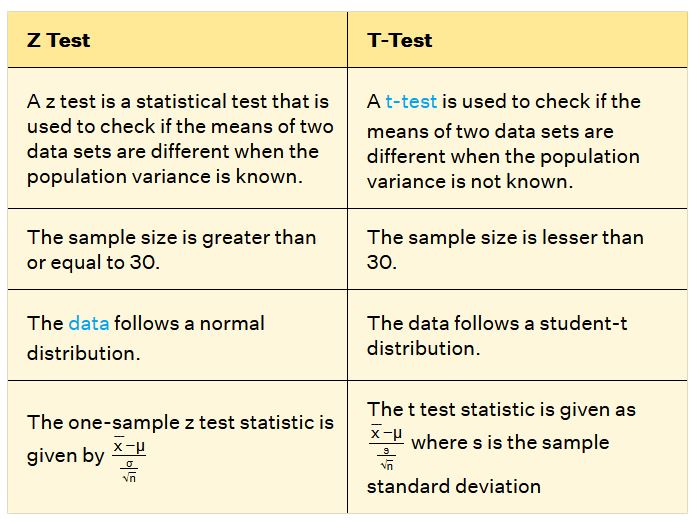

## Z-Test Examples

Example 1:

- The temperature (in degree Celsius) at Manhattan is recorded for 45 winter days. A student from the Geography department wants to test the claim proposed by the weather department. Check whether the given data satisfies the condition of normality with 99% confidence?

In [2]:
## Use the data given below:

temp_winter =  [2.51, 2.6, 1.8, 2.61, 3.9, 1.7, 1.9, 3.1, 1.58, 2.85, 2.9, 1.25, 1.3, 2.4, 3.22, 2.56, 1.32, 1.2, 1.26, 
                3.2, 2.7, 3.5, 2.8, 1.5, 3.8, 1.84, 3.31, 1.24, 1.75, 1.41, 1.57, 1.4, 1.49, 2.26, 2.5, 2.52, 3.42, 1.36, 
                2.35, 2.47, 2.28, 2.22, 2.66, 3.43, 1.98]

### shapiro(x)

- Perform the Shapiro-Wilk test for normality.
- The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [3]:
#H0: Data follows normal distribution
#H1: Data does not follow normal distribution 

alpha=0.01
stat, p_value = stats.shapiro(temp_winter)
print("p value:",p_value)
if(p_value >= alpha):
    print("Follows Normal Distribution")
else:
    print("Does not follow normal distribution")

p value: 0.03401985391974449
Follows Normal Distribution


Example 2:
- The weather department claims that the average temperature in Manhattan is less than 2.8 degree celsius in winter. Test the department's claim using a critical value method with 99% confidence.

In [4]:
#H0: mu = 2.8
#H1: mu < 2.8

# value----> hypothesized mean
# alternative---> smaller(one tailed test)

pop_mean=2.8
alpha=0.01
z_score, p_value = stests.ztest(x1 = temp_winter, value = 2.8, alternative = 'smaller')
print("z score:",z_score)
print("p value:",p_value)

## p-values using z-score 

if z_score < 0:
    p = stats.norm.cdf(z_score)
    print("p:",p)
else:
    p_value = 1-stats.norm.cdf(z_score)
    print("p:",p)

z_critical = stats.norm.isf(q = alpha) 
print("z critical:",z_critical)

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(z_score <= -z_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to reject null hypothesis")

z score: -4.439552007491998
p value: 4.507316464110269e-06
p: 4.507316464110269e-06
z critical: 2.3263478740408408
p-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


Conclusion:
- Claim that the average temperature in Manhattan is less than 2.8 degree celsius in winter is TRUE.

Example 3:
- The bank manager claims that the complaints regarding fraud transactions are less than 12 per month with a standard deviation of 3 frauds. To test the claim the sample data for 3 years is collected. The average number of frauds in sample data is 10. Test the claim with 95% confidence.Assume data is normal.

In [5]:
#H0: mu =12
#H1: mu < 12

pop_mean=12
std=3
n=12*3
sample_mean=10
alpha=0.05

z_score=(sample_mean-pop_mean)/(std/np.sqrt(n))
print("z score:",z_score)

## z < 0 ---> Lower tail test
## z > 0 ---> Upper tail test

if z_score < 0:
    p_value = stats.norm.cdf(z_score)
else:
    p_value = 1-stats.norm.cdf(z_score)

print("p value:",p_value)  ## -----> one tail test

z_critical=stats.norm.isf(alpha)
print("z critical:",z_critical)

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(z_score <= -z_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

z score: -4.0
p value: 3.167124183311986e-05
z critical: 1.6448536269514729
p-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


Conclusion:
- Claim that the complaints regarding fraud transactions are less than 12 per month is TRUE.

Example 4:
- The health magazine in New York states that every person in NY drinks more than 1.8 L water every day with a standard deviation of 0.5 L. To test this claim the physician collects the data of 45 people and found that the average water intake for these people is 1.93 L. Use the p-value technique to test the claim with 95% confidence.Assume data is normal.

In [6]:
#H0: mu =1.8
#H1: mu >1.8

pop_mean=1.8
std=0.5
n=45
sample_mean=1.93
alpha=0.05
   
z_score=(sample_mean-pop_mean)/(std/np.sqrt(n))
print("z score:",z_score)

## z < 0 ---> Lower tail test
## z > 0 ---> Upper tail test

if z_score < 0:
    p_value = stats.norm.cdf(z_score)
else:
    p_value = 1-stats.norm.cdf(z_score)
    
print("p value:",p_value)   ## -----> one tail test

z_critical=stats.norm.isf(alpha)
print("z critical:",z_critical)

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(z_score >= z_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

z score: 1.7441330224498344
p value: 0.04056794851105716
z critical: 1.6448536269514729
p-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


Conclusion:
- Claim that every person in NY drinks more than 1.8 L water every day is TRUE.

Example 5:
- A teacher claims that the mean score of students in his class is greater than 82 with a standard deviation of 20. If a sample of 81 students was selected with a mean score of 90 then check if there is enough evidence to support this claim at a 0.05 significance level.

Solution: As the sample size is 81 and population standard deviation is known, this is an example of a right-tailed one-sample z test.

- H0: μ=82
- H1: μ>82

From the z table the critical value at α= 1.645


 $\begin{equation*}z=\frac{(x−μ)}{(σ/√n)}\end{equation*}$

x= 90, μ = 82, n = 81, σ= 20

z = 3.6

As 3.6 > 1.645 thus, the null hypothesis is rejected and it is concluded that there is enough evidence to support the teacher's claim.

Answer: Reject the null hypothesis

In [7]:
#H0: mu = 82
#H1: mu > 82

pop_mean=82
std=20
n=81
sample_mean=90
alpha=0.05

z_score=(sample_mean-pop_mean)/(std/np.sqrt(n))
print("z score:",z_score)

## z < 0 ---> Lower tail test
## z > 0 ---> Upper tail test

if z_score < 0:
    p_value = stats.norm.cdf(z_score)
else:
    p_value = 1-stats.norm.cdf(z_score)

print("p value:",p_value)  ## one tail test

z_critical=stats.norm.isf(alpha)
print("z critical:",z_critical)

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(z_score >= z_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

z score: 3.5999999999999996
p value: 0.00015910859015755285
z critical: 1.6448536269514729
p-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


Conclusion:
- Teacher's claim that the mean score of students in his class is greater than 82 is TRUE.

Example 6:
- An online medicine shop claims that the mean delivery time for medicines is less than 120 minutes with a standard deviation of 30 minutes. Is there enough evidence to support this claim at a 0.05 significance level if 49 orders were examined with a mean of 100 minutes?

Solution: As the sample size is 49 and population standard deviation is known, this is an example of a left-tailed one-sample z test.

- H0: μ=120
- H1: μ<120

From the z table the critical value at α = -1.645. A negative sign is used as this is a left tailed test.


 $\begin{equation*}z=\frac{(x−μ)}{(σ/√n)}\end{equation*}$

x= 100, μ = 120, n = 49, σ= 30

z = -4.66

As -4.66 < -1.645 thus, the null hypothesis is rejected and it is concluded that there is enough evidence to support the medicine shop's claim.

Answer: Reject the null hypothesis


In [8]:
#H0: mu =120
#H1: mu < 120

pop_mean=120
std=30
n=49
sample_mean=100
alpha=0.05

z_score=(sample_mean-pop_mean)/(std/np.sqrt(n))
print("z score:",z_score)

## z < 0 ---> Lower tail test
## z > 0 ---> Upper tail test

if z_score < 0: 
    p_value = stats.norm.cdf(z_score)
else:
    p_value = 1-stats.norm.cdf(z_score)
    
print("p value:",p_value)  ## -----> one tail test

z_critical=stats.norm.isf(alpha)
print("z critical:",z_critical)

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(z_score <= -z_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

z score: -4.666666666666667
p value: 1.530626736531063e-06
z critical: 1.6448536269514729
p-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


Conclusion:
- Medicine shop's claim that the mean delivery time for medicines is less than 120 minutes is TRUE.

Example 7: 

- A company wants to improve the quality of products by reducing defects and monitoring the efficiency of assembly lines. In assembly line A, there were 18 defects reported out of 200 samples while in line B, 25 defects out of 600 samples were noted. Is there a difference in the procedures at a 0.05 alpha level?

Solution: This is an example of a two-tailed two proportion z test.

- H0: The two population proportions are the same.
- H1: The two population proportions are not the same.

As this is a two-tailed test the alpha level needs to be divided by 2 to get 0.025.

Using this, the critical value from the z table is 1.96.

n1= 200, n2= 600

p1= (18 / 200) = 0.09

p2= (25 / 600) = 0.0416

p = (18 + 25) / (200 + 600) = 0.0537

$\begin{equation*}z =\frac{(p1−p2)−0}{\sqrt{p(1−p)*(\frac{1}{n1}+\frac{1}{n2})}}\end{equation*}$
$\begin{equation*}p = \frac{(x1+x2)}{(n1+n2)}\end{equation*}$

z= 2.62

As 2.62 > 1.96 thus, the null hypothesis is rejected and it is concluded that there is a significant difference between the two lines.

Answer: Reject the null hypothesis

In [9]:
#H0: The two proportions are the same.
#H1: The two proportions are not the same.

x1,x2=18,25
n1,n2=200,600

## p1 and p2 are proportion of sample 1 and 2
p1=x1/n1 
p2=x2/n2

p=(x1+x2)/(n1+n2)
alpha=0.05

z_score=(p1-p2)/np.sqrt((p*(1-p))*(1/n1+1/n2))
print("z score:",z_score)

if z_score < 0: 
    p_value = stats.norm.cdf(z_score)
else:
    p_value = 1-stats.norm.cdf(z_score)
    
print("p value:",p_value) ## Two-tailed two proportion z test

z_critical=stats.norm.isf(alpha/2) ## As this is a two-tailed test the alpha level needs to be divided by 2 to get 0.025.
print("z critical:",z_critical)

# p-value approach

if(p_value <= alpha):
    print("p-value approach: Reject null hypothesis")
else:
    print("p-value approach: Fail to reject null hypothesis")

# Critical value approach

if(z_score >= z_critical):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to  reject null hypothesis")

z score: 2.624824049200042
p value: 0.004334687710036533
z critical: 1.9599639845400545
p-value approach: Reject null hypothesis
Critical value approach: Reject null hypothesis


Conclusion:
- Claim that the two population proportions are different is TRUE.

### References:
- https://www.cuemath.com/data/z-test/